## Imbalanced Data란?

![](https://velog.velcdn.com/images/newnew_daddy/post/988dbdc4-84d1-4256-b335-55a918846799/image.png)

- 한 클래스(보통 다수 클래스)의 샘플 수가 다른 클래스(보통 소수 클래스)의 샘플 수보다 훨씬 많은 데이터 셋.
- 이러한 데이터셋으로 모델을 학습시키면 모델이 다수 클래스를 더 많이 예측하게 되어 성능이 떨어질 수 있습니다.
- 예를 들어 100개의 데이터 중 A가 97개, B가 3개라면, 모두 정상이라고 예측해도 정확도가 97%가 나옴.
- 불균형 데이터 예시
  - 물건의 양품/불량품 데이터
  - 금융 회사의 이상거래 데이터
  - 통신 회사의 고객 유지/이탈 데이터
  - 보안 회사의 정상IP/비정상IP 데이터
  
### 불균형 데이터 대처 방법

![](https://velog.velcdn.com/images/newnew_daddy/post/dd9ce5fc-6256-4824-bed3-77d7cf864d99/image.png)

- 언더 샘플링(Under Sampling)
- 오버 샘플링(Over Sampling)

#### 1. 언더 샘플링 (Under Sampling)
- 다수 클래스의 샘플 수를 줄여서 클래스 간의 균형을 맞추는 방법.
- 소수 클래스와의 비율을 맞추는 샘플링 기법
- 장점 : 데이터가 비교적 적게 샘플링되므로 학습 시간을 줄일 수 있다.
- 단점 : 데이터 제거로 인해 정보의 손실이 발생하고 모델 학습이 온전히 되지 않을 수 있다.
- `imblearn` 라이브러리를 활용하여 실습 가능
  - `pip install imblearn`

#### 1) Random Sampling
- 다수 클래스에서 무작위로 샘플을 제거하여 클래스 간의 균형을 맞추는 방법
- imblearn.under_sampling 모듈에서 사용 가능

In [12]:
## 샘플 데이터 생성

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import pandas as pd
from sklearn.datasets import make_classification

# 데이터 생성
X, y = make_classification(
    n_classes=2,
    class_sep=2, 
    weights=[0.1, 0.9], 
    n_informative=3, 
    n_redundant=1, 
    flip_y=0, 
    n_features=20, 
    n_clusters_per_class=1, 
    n_samples=1000, 
    random_state=10
    )

print('Original dataset shape:', Counter(y))

Original dataset shape: Counter({np.int64(1): 900, np.int64(0): 100})


In [5]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
"""
sampling_strategy 옵션
    - 'majority: 다수 클래스만 리샘플링합니다.
    - 'not minority: 소수 클래스를 제외한 모든 클래스를 리샘플링합니다.
    - 'not majority: 다수 클래스를 제외한 모든 클래스를 리샘플링합니다.
    - 'all: 모든 클래스를 리샘플링합니다.
    - 'auto: 소수 클래스를 제외한 모든 클래스를 리샘플링하는 것으로, 'not minority'와 동일합니다.
"""
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape:', Counter(y_res))

Resampled dataset shape: Counter({np.int64(0): 100, np.int64(1): 100})


#### 2) Tomek Links

![](https://velog.velcdn.com/images/newnew_daddy/post/3c20dd6b-8beb-47b5-aa69-3cbb16183dd5/image.png)

- 서로 다른 클래스의 가장 가까운 두 샘플 쌍을 찾고, 다수 클래스의 샘플을 제거하여 클래스 간의 경계를 더 명확히 하는 샘플링 방법

In [6]:
from imblearn.under_sampling import TomekLinks

# Tomek Links 적용
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X, y)
print('Resampled dataset shape:', Counter(y_res))

Resampled dataset shape: Counter({np.int64(1): 897, np.int64(0): 100})


#### 3) ClusterCentroids

![](https://velog.velcdn.com/images/newnew_daddy/post/6c0e4332-4bca-4924-ba6e-b3bcc1fd2899/image.png)

- 군집화 기법을 사용하여 다수 클래스의 데이터를 줄이는 언더샘플링 방법론.
- 다수 클래스의 데이터를 클러스터링한 후, 각 클러스터의 중심점을 새로운 샘플로 사용하여 데이터를 줄입니다.
- 이를 통해 클래스 간의 불균형을 완화하고 데이터의 분포를 더 균등하게 만듭니다.

In [7]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy='majority')
X_res, y_res = cc.fit_resample(X, y)
print('Resampled dataset shape:', Counter(y_res))

Resampled dataset shape: Counter({np.int64(0): 100, np.int64(1): 100})


#### 4) CNN Rule (Condensed Nearest Neighbor)
- 다수 클래스의 샘플을 제거하여 소수 클래스의 샘플 주위에서 더 명확한 경계를 형성시키는 방법

In [8]:
from imblearn.under_sampling import CondensedNearestNeighbour

# CNN Rule 적용
cnn = CondensedNearestNeighbour(random_state=42)
X_res, y_res = cnn.fit_resample(X, y)
print('Resampled dataset shape:', Counter(y_res))

Resampled dataset shape: Counter({np.int64(0): 100, np.int64(1): 44})


#### 5) One-Sided Selection
- Tomek Links와 CNN Rule을 결합하여 다수 클래스 샘플을 더 효율적으로 제거하는 방법

In [9]:
from imblearn.under_sampling import OneSidedSelection

# One-Sided Selection 적용
oss = OneSidedSelection(random_state=42)
X_res, y_res = oss.fit_resample(X, y)
print('Resampled dataset shape:', Counter(y_res))

Resampled dataset shape: Counter({np.int64(1): 496, np.int64(0): 100})


#### 언더 샘플링 비교 시각화

Original dataset shape: Counter({np.int64(1): 900, np.int64(0): 100})


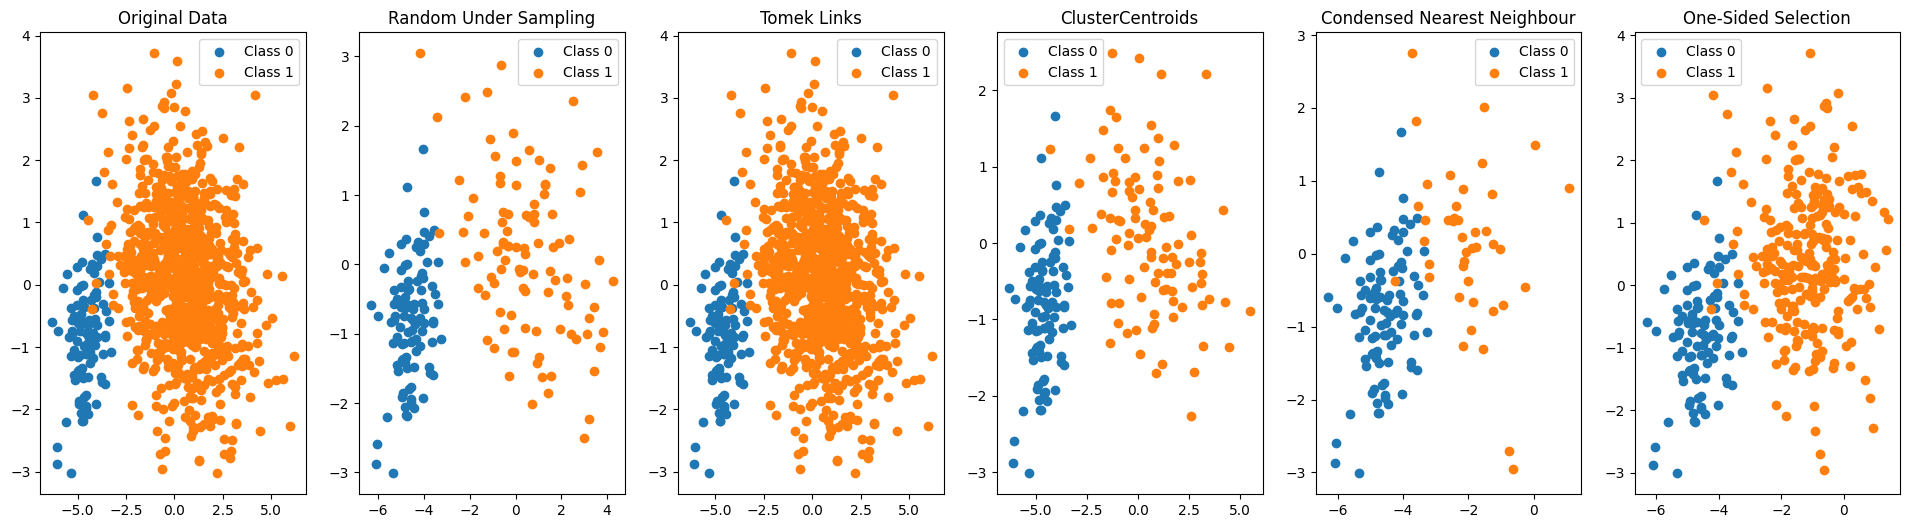

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids, CondensedNearestNeighbour, OneSidedSelection
from collections import Counter

# 데이터 생성
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape:', Counter(y))

# PCA로 2D로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 원본 데이터 시각화
plt.figure(figsize=(24, 6))
plt.subplot(1, 6, 1)
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Class 0')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Class 1')
plt.title('Original Data')
plt.legend()

# Random Under Sampling 적용
rus = RandomUnderSampler(random_state=42)
X_res_rus, y_res_rus = rus.fit_resample(X, y)

# Random Under Sampling 후 데이터 PCA로 2D로 축소
X_res_rus_pca = pca.transform(X_res_rus)

# Random Under Sampling 후 데이터 시각화
plt.subplot(1, 6, 2)
plt.scatter(X_res_rus_pca[y_res_rus == 0, 0], X_res_rus_pca[y_res_rus == 0, 1], label='Class 0')
plt.scatter(X_res_rus_pca[y_res_rus == 1, 0], X_res_rus_pca[y_res_rus == 1, 1], label='Class 1')
plt.title('Random Under Sampling')
plt.legend()

# Tomek Links 적용
tl = TomekLinks(sampling_strategy='majority')
X_res_tl, y_res_tl = tl.fit_resample(X, y)

# Tomek Links 후 데이터 PCA로 2D로 축소
X_res_tl_pca = pca.transform(X_res_tl)

# Tomek Links 후 데이터 시각화
plt.subplot(1, 6, 3)
plt.scatter(X_res_tl_pca[y_res_tl == 0, 0], X_res_tl_pca[y_res_tl == 0, 1], label='Class 0')
plt.scatter(X_res_tl_pca[y_res_tl == 1, 0], X_res_tl_pca[y_res_tl == 1, 1], label='Class 1')
plt.title('Tomek Links')
plt.legend()

# ClusterCentroids 적용
cc = ClusterCentroids(sampling_strategy='majority')
X_res_cc, y_res_cc = cc.fit_resample(X, y)

X_res_cc_pca = pca.transform(X_res_cc)

plt.subplot(1, 6, 4)
plt.scatter(X_res_cc_pca[y_res_cc == 0, 0], X_res_cc_pca[y_res_cc == 0, 1], label='Class 0')
plt.scatter(X_res_cc_pca[y_res_cc == 1, 0], X_res_cc_pca[y_res_cc == 1, 1], label='Class 1')
plt.title('ClusterCentroids')
plt.legend()

# Condensed Nearest Neighbour 적용
cnn = CondensedNearestNeighbour()
X_res_cnn, y_res_cnn = cnn.fit_resample(X, y)

X_res_cnn_pca = pca.transform(X_res_cnn)

plt.subplot(1, 6, 5)
plt.scatter(X_res_cnn_pca[y_res_cnn == 0, 0], X_res_cnn_pca[y_res_cnn == 0, 1], label='Class 0')
plt.scatter(X_res_cnn_pca[y_res_cnn == 1, 0], X_res_cnn_pca[y_res_cnn == 1, 1], label='Class 1')
plt.title('Condensed Nearest Neighbour')
plt.legend()

# One-Sided Selection 적용
oss = OneSidedSelection()
X_res_oss, y_res_oss = oss.fit_resample(X, y)

X_res_oss_pca = pca.transform(X_res_oss)

plt.subplot(1, 6, 6)
plt.scatter(X_res_oss_pca[y_res_oss == 0, 0], X_res_oss_pca[y_res_oss == 0, 1], label='Class 0')
plt.scatter(X_res_oss_pca[y_res_oss == 1, 0], X_res_oss_pca[y_res_oss == 1, 1], label='Class 1')
plt.title('One-Sided Selection')
plt.legend()

plt.show()